<a href="https://colab.research.google.com/github/Shreejit2401/pre-bootcamp/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt

#Task 1
Write a Python code using Matplotlib to plot a polar plot that displays the trajectory of a projectile launched from the origin at an angle of 30 degrees with an initial velocity of 20 m/s. Assume that the projectile experiences a constant gravitational acceleration of 9.8 m/s^2, and air resistance is negligible. Label the axes and display the maximum height and the range of the projectile in the title.

In [9]:
g = 9.8
# theta = math.radians(30)
tetha = 30
v0 = 20
t_max = 2 * v0 * math.sin(theta) / g

In [10]:
t = np.linspace(0, 2*v0*np.sin(theta*np.pi/180)/g, 100)
x = v0*np.cos(theta*np.pi/180)*t
y = v0*np.sin(theta*np.pi/180)*t - 0.5*g*t**2

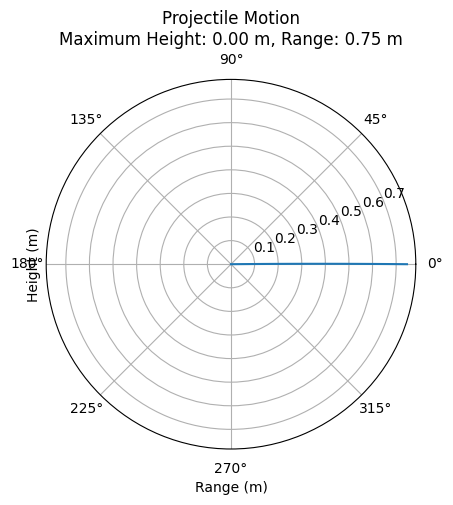

In [11]:
plt.polar(np.arctan2(y,x), np.sqrt(x**2 + y**2))
plt.title("Projectile Motion\nMaximum Height: {:.2f} m, Range: {:.2f} m".format(max(y), max(x)))
plt.xlabel("Range (m)")
plt.ylabel("Height (m)")
plt.show()

#Task 2
Write a Python code using Matplotlib to plot a stacked bar chart that displays the distribution of a dataset consisting of 100,000 values, where each value belongs to one of three categories. Display the distribution of each category for every 10,000 values, with the bottom bar representing the first 10,000 values and the top bar representing the last 10,000 values. Color each bar with a gradient that changes from blue to red as the values increase.

In [48]:
from matplotlib.colors import LinearSegmentedColormap

In [59]:
# Generate random sample for three categories
data = np.random.randint(0, 3, size=100000)

bins = [i*10000 for i in range(11)]

freqs = []
for i in range(len(bins)-1):
    freq, _ = np.histogram(data[bins[i]:bins[i+1]], bins=[0,1,2,3])
    freqs.append(freq)

cmap = LinearSegmentedColormap.from_list('custom gradient', ['#000000','#ffffff'])

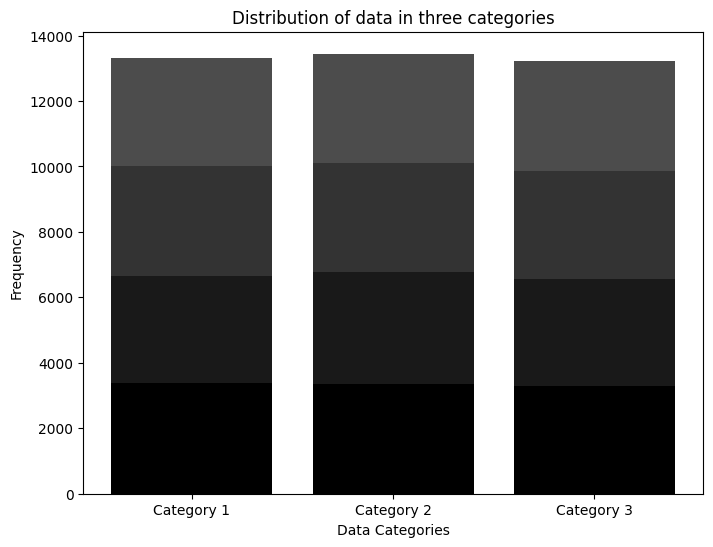

In [62]:
# Plot the stacked bar chart with the gradient color
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(3), freqs[0], color=cmap(0.0))
for i in range(1, 4):
    ax.bar(range(3), freqs[i], bottom=np.sum(freqs[:i], axis=0), color=cmap(i/10))
ax.set_xticks(range(3))
ax.set_xticklabels(['Category '+str(i+1) for i in range(3)])
ax.set_xlabel('Data Categories')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of data in three categories')
plt.show()

#Task 3
Write a Python code using Matplotlib to plot a histogram that displays the frequency distribution of a dataset consisting of 10,000 randomly generated values with a normal distribution, where the mean is 50 and the standard deviation is 10. Color the bars with a gradient, such that the color of each bar is proportional to the height of the bar.

In [72]:
# Generate random data with normal distribution
np.random.seed(2401)
data = np.random.normal(50, 10, size=10000)

<ipython-input-73-25ade232d7d2>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


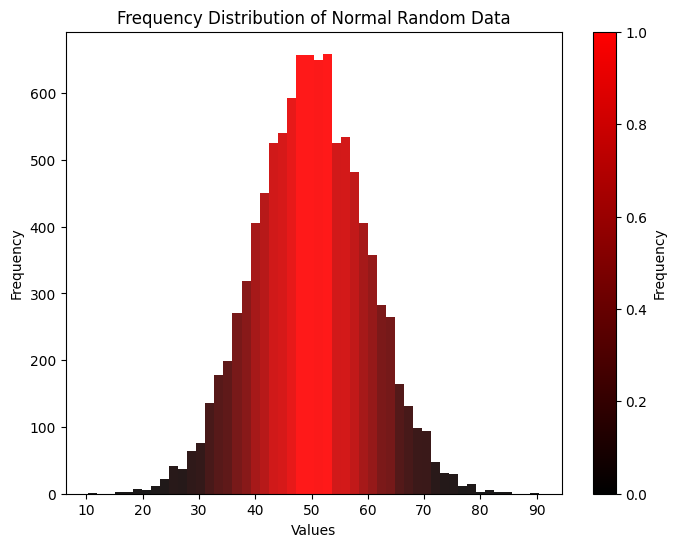

In [73]:
# Create a gradient color map
cmap = LinearSegmentedColormap.from_list('custom gradient', ['#000','#FF0000'])
fig, ax = plt.subplots(figsize=(8, 6))
n, bins, patches = ax.hist(data, bins=50, density=False, alpha=0.9)
for i in range(len(patches)):
    patches[i].set_fc(cmap(n[i]/max(n)))
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Distribution of Normal Random Data')
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Frequency')
plt.show()